In [1]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from IPython.display import display
from collections import Counter
import os
# import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import bcubed

# Evaluate authorship clustering

# Supervised baselines on authorship attribution, AO3

In [17]:
# Load data
metadata = pd.read_csv('/usr2/mamille2/AO3Scraper/data/hp_ao3_metadata.csv')
print(metadata.shape)
print(metadata.columns)

(116622, 20)
Index(['Unnamed: 0', 'work_id', 'title', 'author_hash', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'chapters', 'comments',
       'kudos', 'bookmarks', 'hits'],
      dtype='object')


In [19]:
threshold = 10
# author_story_counts = metadata['author_id'].value_counts()
author_story_counts = metadata['author_hash'].value_counts()
author_ids = sorted(set(author_story_counts[author_story_counts >= threshold].index))
len(author_ids)

2003

In [23]:
# Load matching stories
stories = []
# story_dirpath = '/usr2/mamille2/fanfiction-project/data/hp/stories/'
story_dirpath = '/usr2/mamille2/AO3Scraper/data/hp_fics.csv_text_files'

for a_id in tqdm(author_ids):
#     story_ids = metadata.loc[metadata['author_id']==a_id, 'work_id'].tolist()
    story_ids = metadata.loc[metadata['author_hash']==a_id, 'work_id'].tolist()
    author_text = ''
    for s_id in story_ids:
        text_filepath = os.path.join(story_dirpath, f'{s_id}.txt')
        if not os.path.exists(text_filepath):
            continue
        with open(text_filepath) as f:
            author_text += f'{f.read()}\n'
            
    stories.append(author_text)
    
len(stories)

2003

In [24]:
# Vectorize
vec = CountVectorizer(max_features=50000)
X = vec.fit_transform(stories)
X.shape

(2003, 50000)

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, author_ids)

In [26]:
# Train, evaluate classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.0

# Create authorship attribution dataset from incomplete FF.net 3+ stories

In [2]:
# Load data
# metadata = pd.read_csv('/usr2/mamille2/AO3Scraper/hp_metadata.csv')
metadata = pd.read_csv('/usr2/mamille2/fanfiction-project/data/hp/hp_ff-net_metadata_incomplete.csv')
print(metadata.shape)
print(metadata.columns)

(350888, 14)
Index(['id', 'canon_type', 'canon', 'author_id', 'title', 'updated',
       'published', 'lang', 'genres', 'num_reviews', 'num_favs', 'num_follows',
       'num_words', 'rated'],
      dtype='object')


In [6]:
author_story_counts.head()

2861617    636
981007     547
924518     513
941781     483
2648815    453
Name: author_id, dtype: int64

In [7]:
len(author_story_counts)

128871

In [8]:
len(metadata['author_id'].unique())

128871

In [15]:
threshold = 10
author_story_counts = metadata['author_id'].value_counts()
author_ids = sorted(set(author_story_counts[author_story_counts >= threshold].index))
len(author_ids)

5204

In [26]:
# Load matching stories
stories = []
story_dirpath = '/usr2/mamille2/fanfiction-project/data/hp/stories/'

for a_id in tqdm(author_ids):
    story_ids = metadata.loc[metadata['author_id']==a_id, 'id'].tolist()
    author_text = ''
    for s_id in story_ids:
        with open(os.path.join(story_dirpath, f'{s_id}.txt')) as f:
            author_text += f'{f.read()}\n'
            
    stories.append(author_text)
    
len(stories)

5204

In [33]:
# Vectorize
vec = CountVectorizer(max_features=50000)
X = vec.fit_transform(stories)
X.shape

(5204, 50000)

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, author_ids)

In [35]:
# Train, evaluate classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
preds = clf.predict(X_test)


# Check author/#works curve

In [4]:
# Load data
metadata = pd.read_csv('/usr2/mamille2/AO3Scraper/data/hp_ao3_metadata.csv')
# metadata = pd.read_csv('/usr2/mamille2/fanfiction-project/data/hp/hp_ff-net_metadata_incomplete.csv')
print(metadata.shape)
print(metadata.columns)

(116622, 20)
Index(['Unnamed: 0', 'work_id', 'title', 'author_hash', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'chapters', 'comments',
       'kudos', 'bookmarks', 'hits'],
      dtype='object')


In [6]:
# n_unique = len(metadata['author_id'].unique())
n_unique = len(metadata['author_hash'].unique())
print(n_unique)
print(len(metadata)/n_unique)

22322
5.224531851984589


In [15]:
# Basic stats
# work_counts = metadata['author_id'].value_counts().value_counts()
work_counts = metadata['author_hash'].value_counts().value_counts()

print(work_counts[1]/work_counts.sum())

0.521637846071


In [12]:
for min_story_count in [3,5,10]:
    print(f'{min_story_count}: {work_counts.loc[min_story_count:,].sum()}')

3: 7131
5: 4191
10: 2003


In [13]:
work_counts.head()

1    11644
2     3547
3     1818
4     1122
5      749
Name: author_hash, dtype: int64

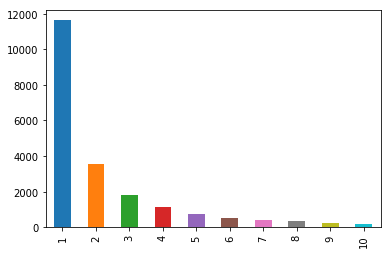

In [14]:
%matplotlib inline

work_counts.head(10).plot.bar()